In [5]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

true_labels = [0, 0, 1, 1, 2, 2, 3, 3]
predicted_labels = [0, 0, 1, 1, 2, 2, 3, 0]

matrix = confusion_matrix(true_labels, predicted_labels)
# precision = precision_score(true_labels, predicted_labels, average='weighted')
# recall = recall_score(true_labels, predicted_labels)

print(matrix)

[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [1 0 0 1]]


Accuracy: 0.4
[[ 0  3 16]
 [ 0  6  7]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.60      0.46      0.52        13
           2       0.34      0.92      0.50        13

    accuracy                           0.40        45
   macro avg       0.31      0.46      0.34        45
weighted avg       0.27      0.40      0.30        45



x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

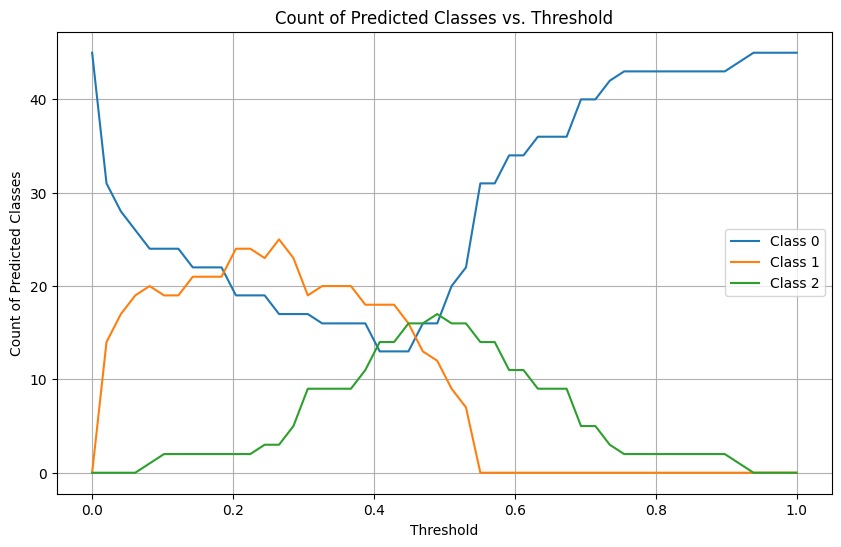

In [93]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
y = iris.target
X = iris.data[:,0:1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)
np.set_printoptions(suppress=True)
# print(y_prob)
thresholds = [1.0, 0.5, 0.0]

y_pred_threshold = np.zeros_like(y_prob, dtype=int)
for i in range(y_prob.shape[1]):
    y_pred_threshold[:, i] = (y_prob[:, i] >= thresholds[i]).astype(int)

for i in range(y_pred_threshold.shape[0]):
    if np.all(y_pred_threshold[i] == 0):
        y_pred_threshold[i][np.argmax(y_prob[i])] = 1

y_pred = np.argmax(y_pred_threshold, axis=1)

# print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

matrix = confusion_matrix(y_test, y_pred)
print(matrix)
for x in str(classification_report(y_test, y_pred)).split('\n'):
    print(x)

thresholds = np.linspace(0, 1, 50)
class_counts = np.zeros((len(thresholds), y_prob.shape[1]))

for j, threshold in enumerate(thresholds):
    y_pred_threshold = np.zeros_like(y_prob, dtype=int)
    for i in range(y_prob.shape[1]):
        y_pred_threshold[:, i] = (y_prob[:, i] >= threshold).astype(int)

    # for i in range(y_pred_threshold.shape[0]):
    #     if np.all(y_pred_threshold[i] == 0):
    #         y_pred_threshold[i][np.argmax(y_prob[i])] = 1

    y_pred = np.argmax(y_pred_threshold, axis=1)

    for i in range(y_prob.shape[1]):
        class_counts[j, i] = np.sum(y_pred == i)

plt.figure(figsize=(10, 6))

for i in range(y_prob.shape[1]):
    plt.plot(thresholds, class_counts[:, i], label=f'Class {i}')

plt.xlabel('Threshold')
plt.ylabel('Count of Predicted Classes')
plt.title('Count of Predicted Classes vs. Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()